In [1]:
from context import segmentationtools
import segmentationtools.fseg as fseg

import cv2
import time
import numpy as np
import math
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[2.38860963e-07 3.76184460e-07 4.74961382e-07 5.16508180e-07
 5.40648273e-07 5.40712563e-07 5.40863937e-07 5.41095460e-07
 5.41552652e-07 5.42500288e-07 5.43559736e-07 5.45097691e-07
 5.47107049e-07 5.49400113e-07 5.52320785e-07 5.56094108e-07
 5.60293756e-07 5.66424944e-07 5.74403430e-07 5.84552311e-07
 5.98255838e-07 6.12628185e-07 6.31008390e-07 6.51159098e-07
 6.73895443e-07 7.02701243e-07 7.33352010e-07 7.70622023e-07
 8.11056111e-07 8.57681869e-07 9.12441465e-07 9.72566227e-07
 1.03614445e-06 1.10249084e-06 1.18030800e-06 1.26919326e-06
 1.36510664e-06 1.46818479e-06 1.57753993e-06 1.69877319e-06
 1.83798591e-06 2.00389309e-06 2.19998560e-06 2.41954103e-06
 2.68532949e-06 2.95580890e-06 3.27281259e-06 3.62456717e-06
 3.99709234e-06 4.42772398e-06 4.95242193e-06 5.53211703e-06
 6.15591807e-06 6.85317445e-06 7.62067248e-06 8.43297494e-06
 9.40711743e-06 1.04795099e-05 1.17581121e-05 1.31155457e-05
 1.48081444e-05 1.66134487e-05 1.85185145e-05 2.06815457e-05
 2.30976111e-05 2.555030

c:\Users\u0146408\Documents\DoctoraatLocal\generic-segmentation-tools\segmentationtools\fseg\__init__.py:183: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  tmp, _, _, _ = LA.lstsq(np.dot(w0.T, w0) + np.eye(segn) * .01, np.dot(w0.T, Y.T))
c:\Users\u0146408\Documents\DoctoraatLocal\generic-segmentation-tools\segmentationtools\fseg\__init__.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  tmp, _, _, _ = LA.lstsq(np.dot(h, h.T) + np.eye(segn) * .01, np.dot(h, Y))


0 0.9818278033470748 0.018172196652925292
1 0.0006237008851143859 0.017548495767810906
FSEG runs in 7.14 seconds. 


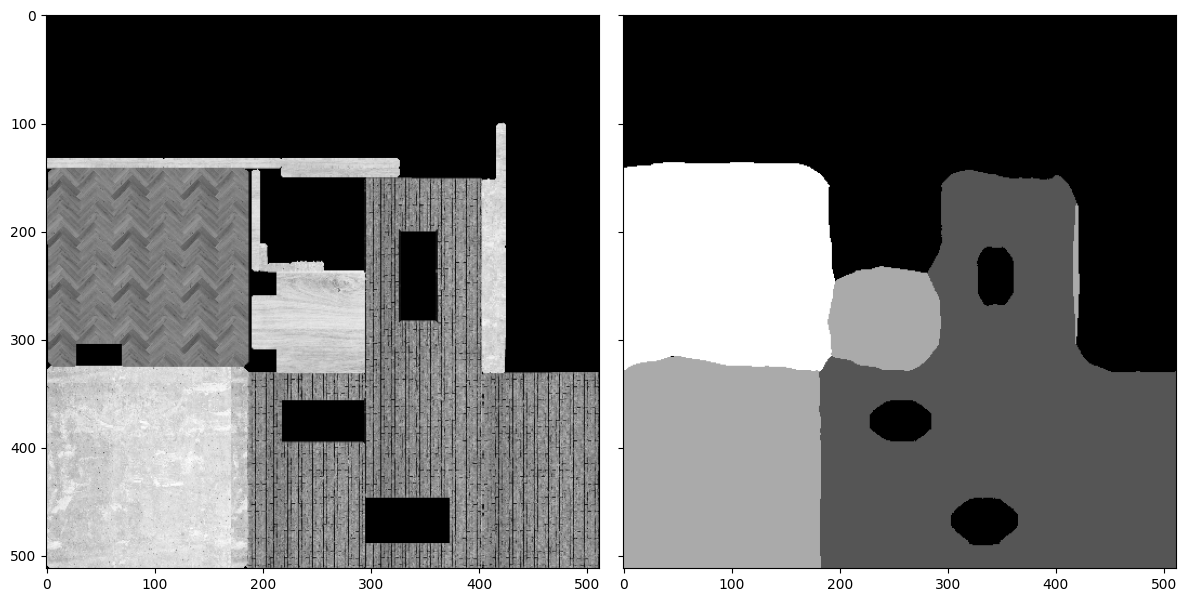

In [2]:
time0 = time.time()
# an example of using Fseg
# read image
img = cv2.imread('../img/DemoHouse4k.png', 0)
img = cv2.resize(img, (512, 512))

# define filter bank and apply to image. for color images, convert rgb to grey scale and then apply filter bank
filter_list = [('log', .5, [3, 3]), ('log', 1, [5, 5]),
                ('gabor', 1.5, 0), ('gabor', 1.5, math.pi/2), ('gabor', 1.5, math.pi/4), ('gabor', 1.5, -math.pi/4),
                ('gabor', 2.5, 0), ('gabor', 2.5, math.pi/2), ('gabor', 2.5, math.pi/4), ('gabor', 2.5, -math.pi/4)
                ]

filter_out = fseg.image_filtering(img, filter_list=filter_list)

# include original image as one band
Ig = np.concatenate((np.float32(img.reshape((img.shape[0], img.shape[1], 1))), filter_out), axis=2)

# run segmentation. try different window size, with and without nonneg constraints
seg_out = fseg.Fseg(Ig, ws=50, segn=0, omega=.05, nonneg_constraint=True)

print ('FSEG runs in %0.2f seconds. ' % (time.time() - time0))

# show results
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(seg_out, cmap='gray')
plt.tight_layout()
plt.show()